In [1]:
from housing_prices.model import *
from housing_prices.config import *
from housing_prices.prepare_data import *

In [2]:
model_config = load_config()
model = HousingPricesModel(model_config)
model.pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('Categorical Preprocessor',
                                                  OneHotEncoder(categories=[['20',
                                                                             '30',
                                                                             '40',
                                                                             '45',
                                                                             '50',
                                                                             '60',
                                                                             '70',
                                                                             '75',
                                                                             '80',
                                                                             '85',
                                                                             '90',
                                                                             '120',
                                                                             '150',
                                                                             '160',
                                                                             '180',
                                                                             '190'],
                                                                            ['A',
                                                                             'C',
                                                                             'FV',
                                                                             'I',
                                                                             'RH',
                                                                             'RL',
                                                                             'RP',
                                                                             'RM'],
                                                                            ['NA',
                                                                             'Grvl',
                                                                             'Pave'],
                                                                            ['Lvl',
                                                                             'Bnk',
                                                                             'HLS',
                                                                             'Low'],...
                                                   'OverallQual', 'OverallCond',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'KitchenQual', 'Functional',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('knnimputer', KNNImputer(n_neighbors=2)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=0))])

In [3]:
X, y = load_train_data()
model.pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('Categorical Preprocessor',
                                                  OneHotEncoder(categories=[['20',
                                                                             '30',
                                                                             '40',
                                                                             '45',
                                                                             '50',
                                                                             '60',
                                                                             '70',
                                                                             '75',
                                                                             '80',
                                                                             '85',
                                                                             '90',
                                                                             '120',
                                                                             '150',
                                                                             '160',
                                                                             '180',
                                                                             '190'],
                                                                            ['A',
                                                                             'C',
                                                                             'FV',
                                                                             'I',
                                                                             'RH',
                                                                             'RL',
                                                                             'RP',
                                                                             'RM'],
                                                                            ['NA',
                                                                             'Grvl',
                                                                             'Pave'],
                                                                            ['Lvl',
                                                                             'Bnk',
                                                                             'HLS',
                                                                             'Low'],...
                                                   'OverallQual', 'OverallCond',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'KitchenQual', 'Functional',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('knnimputer', KNNImputer(n_neighbors=2)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=0))])

In [4]:
model.pipeline.score(X, y)

0.9664120757269801

[Text(0.5, 0.875, 'x[196] <= 6.5\nfriedman_mse = 6306788585.349\nsamples = 1460\nvalue = 0.0'),
 Text(0.25, 0.625, 'x[196] <= 5.5\nfriedman_mse = 2426928665.05\nsamples = 1231\nvalue = -23088.763'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[228] <= 1378.5\nfriedman_mse = 1411538921.037\nsamples = 912\nvalue = -40537.22'),
 Text(0.0625, 0.125, 'friedman_mse = 837746927.031\nsamples = 564\nvalue = -56013.418'),
 Text(0.1875, 0.125, 'friedman_mse = 1324189529.34\nsamples = 348\nvalue = -15455.107'),
 Text(0.375, 0.375, 'x[228] <= 1941.0\nfriedman_mse = 1971049955.987\nsamples = 319\nvalue = 26795.227'),
 Text(0.3125, 0.125, 'friedman_mse = 1243894899.002\nsamples = 239\nvalue = 13317.549'),
 Text(0.4375, 0.125, 'friedman_mse = 1979517700.562\nsamples = 80\nvalue = 67059.792'),
 Text(0.75, 0.625, 'x[196] <= 7.5\nfriedman_mse = 8893038849.977\nsamples = 229\nvalue = 124114.704'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[228] <= 1971.5\nfriedman_mse = 4058765722.773\n

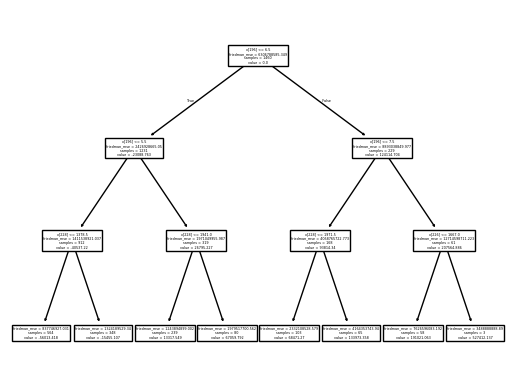

In [5]:
from sklearn import tree

reg: GradientBoostingRegressor = model.pipeline[2]

# Access the decision trees
estimators = reg.estimators_
single_tree = estimators[0][0]

tree.plot_tree(single_tree)
# print(tree.export_text(single_tree))

In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model.pipeline, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.90641122 0.84382992 0.89066288 0.89765275 0.88173971]
0.88 accuracy with a standard deviation of 0.02


In [9]:
model.persist()